<a href="https://colab.research.google.com/github/SanggarLucky/Tutorial_Google_Colab/blob/master/Kenalan_dengan_Google_Colab_dan_coba_GPU_Gratis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Colab and GPU

Singkatnya, Colaboratory, atau "Colab", memungkinkan Anda untuk menulis dan menjalankan Python:
- Tanpa memerlulukan konfigurasi 
- Akses gratis ke GPU
- Mudah berbagi dengan github atau google drive

Pertama, Anda harus mengaktifkan GPU untuk notebook:

- Arahkan ke Runtime → Change Runtime Type
- dari drop-down Hardware Accelerator  pilih GPU

Selanjutnya mengonfirmasi bahwa Anda telah terhubung ke GPU 
berikut adalah melakuan cek GPU pada Tensorflow maupun dengan PyTorch

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [26]:
import torch
torch.cuda.device(0)
print (torch.cuda.get_device_name(0))

Tesla K80


Wow Tesla K80 kalau di cek di Toped atau Bukalapak sampe 80-90 juta

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.7576879219999455
GPU (s):
0.19018144899996514
GPU speedup over CPU: 19x


Cek kecepatan : dengan GPU kecepatan running deep learning adalah 19X dari CPU

Sekarang kita coba train Neural Network dengan Fast ai dengan tutorial lesson pertama mereka
[klik di sini](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

Kita akan menggunakan Oxford-IIIT Pet Dataset oleh O. M. Parkhi et al., 2012 yang menampilkan 12 ras kucing dan 25 ras anjing. Model kita perlu belajar membedakan antara 37 kategori berbeda ini. Menurut makalah mereka, akurasi terbaik yang bisa mereka dapatkan di 2012 adalah 59,21%, menggunakan model kompleks yang khusus untuk deteksi hewan peliharaan, dengan model "Gambar", "Kepala", dan "Tubuh" yang terpisah untuk foto-foto hewan peliharaan. Mari kita lihat seberapa akurat kita bisa menggunakan Fast AI!

 

In [ ]:
help(untar_data)
path = untar_data(URLs.PETS); path

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [ ]:
path_anno = path/'annotations'
path_img = path/'images'

In [ ]:
fnames = get_image_files(path_img)
fnames[:5]


[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_93.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_196.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_73.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_140.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_180.jpg')]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

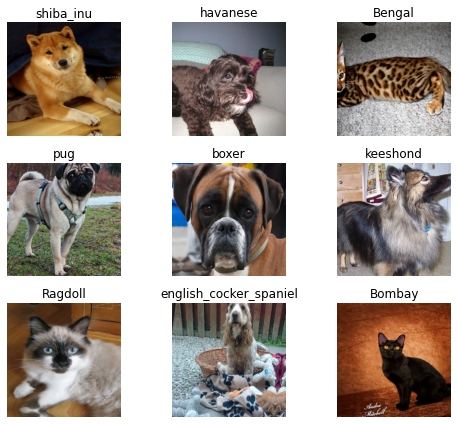

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.389862,0.327023,0.112991,01:58
1,0.631608,0.278638,0.090663,01:59
2,0.396830,0.227203,0.071719,01:57
3,0.280682,0.202793,0.067659,02:00


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

True

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


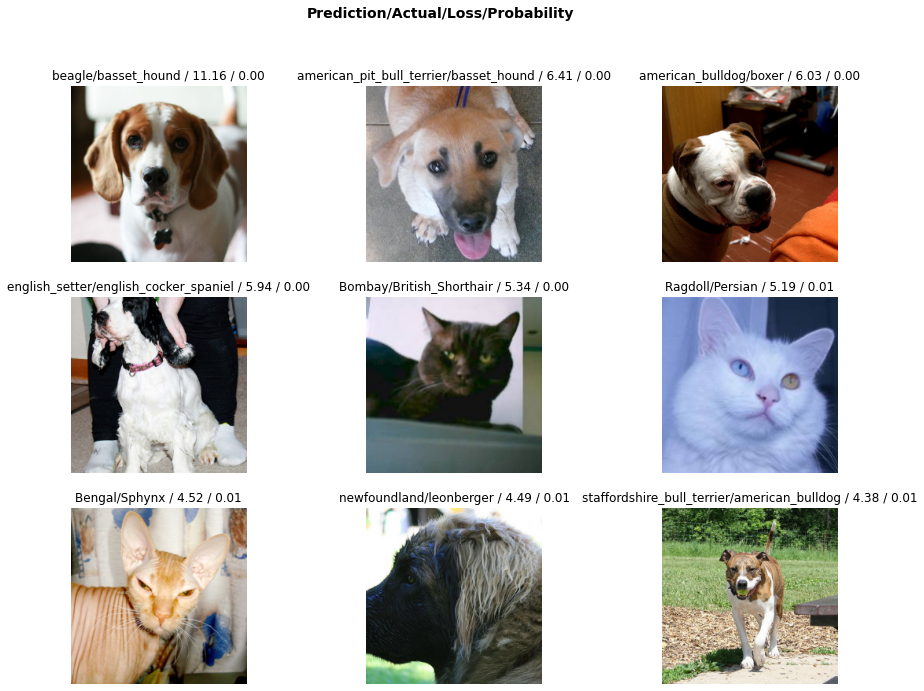

In [28]:
interp.plot_top_losses(9, figsize=(15,11))

In [29]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('Bengal', 'Abyssinian', 5),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Birman', 'Ragdoll', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Birman', 'Siamese', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Persian', 'Ragdoll', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('boxer', 'american_bulldog', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'american_pit_bull_terrier', 2),
 ('boxer', 'saint_bernard', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('yorkshire_terrier', 'havanese', 2)]

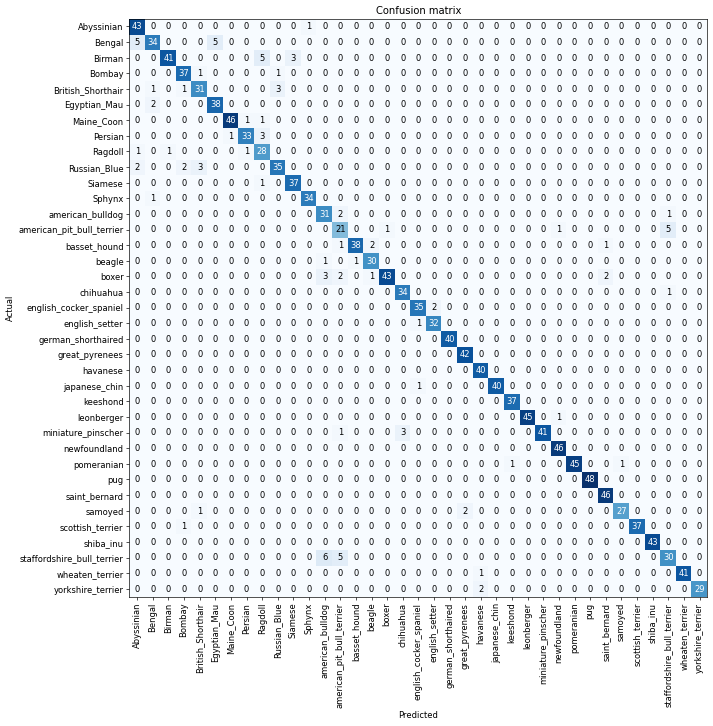

In [30]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Sava di Drive

Berikutnya adalah cara menyimpan note book. Notebook sudah otomatis sync sama google drive. Bisa diklik file dan save juga. Lalu cara menshare adalah dengan klik share dan bagi link dengan:
*  View
*  Comment
*  Edit

hati hati dengan share edit, karena bisa mengubah kode yang udah dibuat. Sebaiknya view dan mereka bisa melakukan copy.
 ![Klik Share](https://i.stack.imgur.com/BrGhI.png)

## Save di Github Repository

Sebelum simpan di Github , buat dulu repositorynya. Di github kita bisa kolaborasi dan berbagi kode secara umum. Install extension colab di chrome dan begitu buka di halaman github langsung bisa copy kodenya. 